<a href="https://colab.research.google.com/github/vijayshankarrealdeal/intro_to_pytorch-Gans/blob/main/GansIntro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
from torchvision.datasets import MNIST
from torch.utils.data import DataLoader
from torchvision.utils import make_grid
from tqdm.auto import tqdm
import matplotlib.pyplot as plt
from torchvision import transforms

In [ ]:
def show_image_from_tensor(image_tensor,num_images = 25,size = (1,28,28)):
    image_unflat = image_tensor.detach().cpu().view(-1, *size)
    image_grid = make_grid(image_unflat[:num_images], nrow=5)
    plt.imshow(image_grid.permute(1, 2, 0).squeeze())
    plt.show()


In [ ]:
tensor_matrix = torch.randint(1,255,(1,28,28))

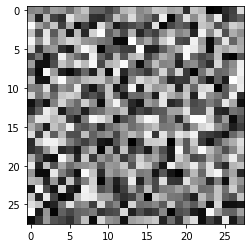

In [ ]:
show_image_from_tensor(tensor_matrix)

In [ ]:
class Genrator(nn.Module):
  def __init__(self,z_dim = 10 ,hidden_dim = 128,output_shape = 784):
    super(Genrator,self).__init__()
    self.gen = nn.Sequential(
        self.get_genrator_block(z_dim, hidden_dim),
        self.get_genrator_block(hidden_dim, hidden_dim * 2),
        self.get_genrator_block(hidden_dim * 2, hidden_dim * 4),
        self.get_genrator_block(hidden_dim * 4, hidden_dim * 8),
        nn.Linear(hidden_dim * 8,output_shape),
        nn.Sigmoid(),
    )
  def get_genrator_block(self,input_shape,output_shape):
    return nn.Sequential(
        nn.Linear(input_shape,output_shape),
        nn.BatchNorm1d(output_shape),
        nn.ReLU(inplace = True),
  )
  def forward(self,noise):
    return self.gen(noise)

In [ ]:
def genrate_noise(n_sample,z_dim,device = 'cpu'):
  return torch.randn(n_sample,z_dim,device = device)

In [ ]:
class Discriminator(nn.Module):
  def __init__(self,im_dim = 784,hidden_units = 128):
    super(Discriminator,self).__init__()
    self.dis = nn.Sequential(
        self.get_discriminator_block(im_dim,hidden_units*8),
        self.get_discriminator_block(hidden_units*8,hidden_units*4),
        self.get_discriminator_block(hidden_units*4,hidden_units*2),
        self.get_discriminator_block(hidden_units*2,hidden_units),
        nn.Linear(hidden_units,1)
    )
  def get_discriminator_block(self,input_shape,output_shape):
    return nn.Sequential(
        nn.Linear(input_shape,output_shape),
        nn.LeakyReLU(0.2),
  )
  def forward(self,x):
    return self.dis(x)

In [ ]:
criterion = nn.BCEWithLogitsLoss()
n_epochs = 200
z_dim = 64
display_step = 1000
batch_size = 128
lr = 0.00001

dataloader = DataLoader(
    MNIST('.', download=True, transform=transforms.ToTensor()),
    batch_size=batch_size,
    shuffle=True)
device = 'cuda'


Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw




Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw



/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [ ]:
gen = Genrator(z_dim).to(device)
gen_opt = torch.optim.Adam(gen.parameters(), lr=lr)
disc = Discriminator().to(device) 
disc_opt = torch.optim.Adam(disc.parameters(), lr=lr)

Epoch 2, step 1000: Generator loss: 3.156171739280228, discriminator loss: 0.17071199969202316


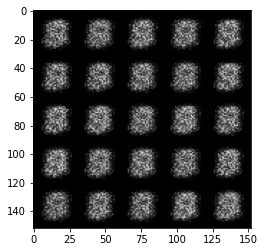

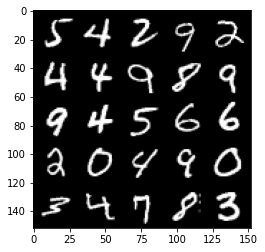

Epoch 4, step 2000: Generator loss: 4.103524230003356, discriminator loss: 0.035580103472806504


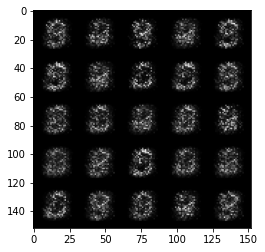

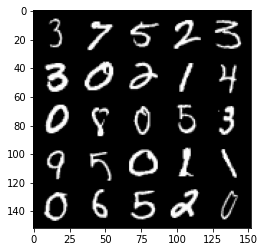

Epoch 6, step 3000: Generator loss: 4.843264612436289, discriminator loss: 0.031562510608695436


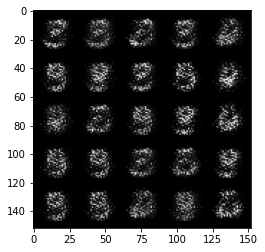

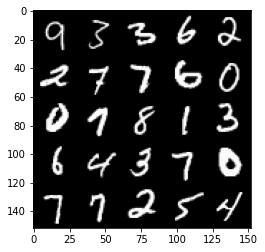

Epoch 8, step 4000: Generator loss: 6.264003236770618, discriminator loss: 0.019758883098140355


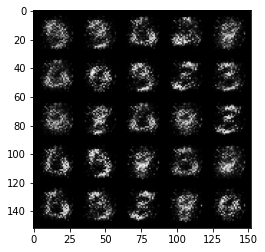

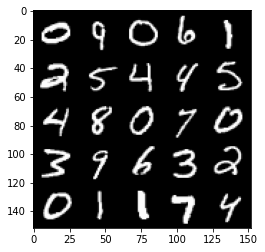

Epoch 10, step 5000: Generator loss: 6.539003217220315, discriminator loss: 0.022428464324213554


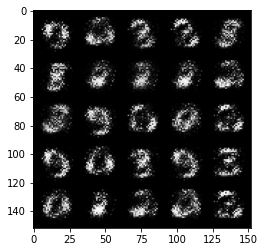

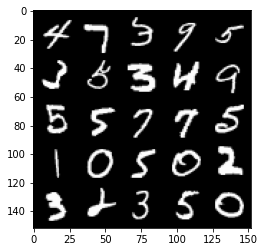

Epoch 12, step 6000: Generator loss: 6.965811075687403, discriminator loss: 0.017417735757306194


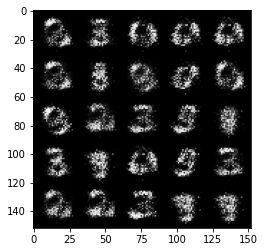

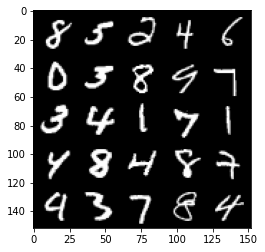

Epoch 14, step 7000: Generator loss: 7.334682314395897, discriminator loss: 0.013753126250463531


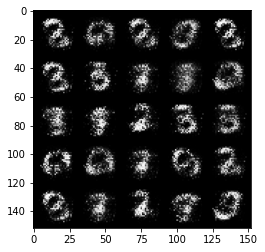

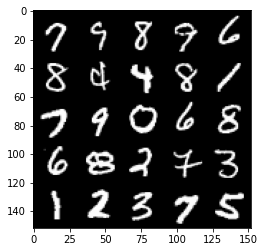

Epoch 17, step 8000: Generator loss: 7.657559529781338, discriminator loss: 0.0111835851635551


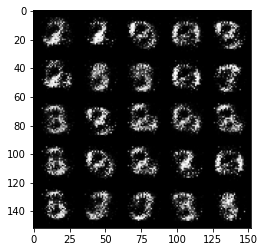

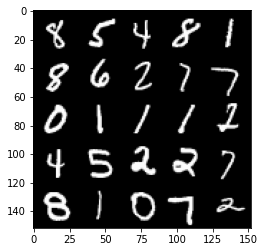

Epoch 19, step 9000: Generator loss: 8.045024509429918, discriminator loss: 0.009437563925283027


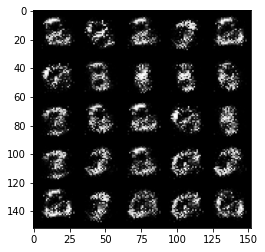

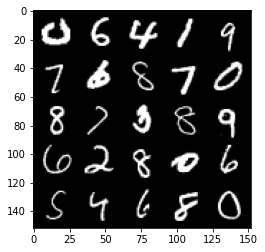

Epoch 21, step 10000: Generator loss: 8.572219002723692, discriminator loss: 0.012199410787550725


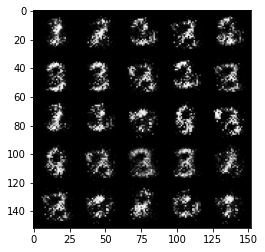

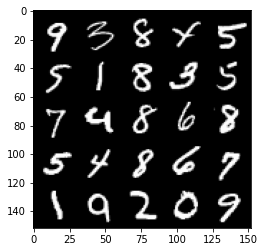

Epoch 23, step 11000: Generator loss: 8.120899590492252, discriminator loss: 0.01695819650532213


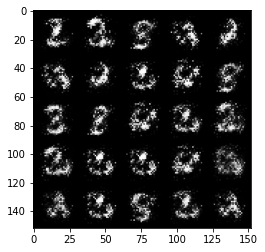

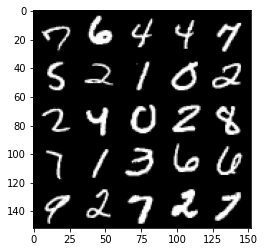

Epoch 25, step 12000: Generator loss: 8.471249610424056, discriminator loss: 0.013338692187098785


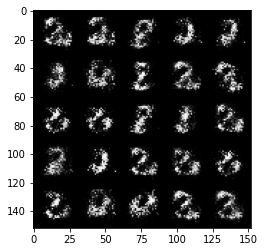

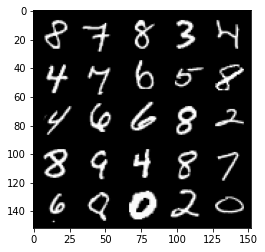

Epoch 27, step 13000: Generator loss: 8.313583627223972, discriminator loss: 0.012141307594021766


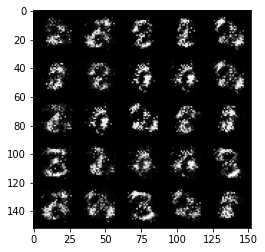

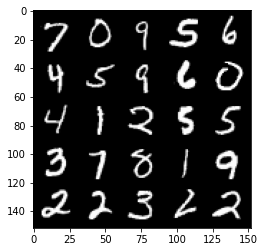

Epoch 29, step 14000: Generator loss: 8.091163613319402, discriminator loss: 0.014144454710185526


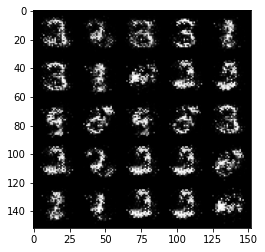

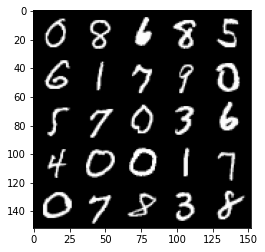

Epoch 31, step 15000: Generator loss: 8.033661705970763, discriminator loss: 0.016844401012756843


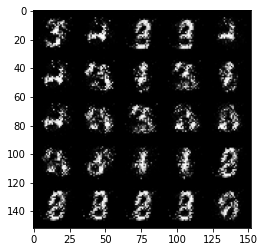

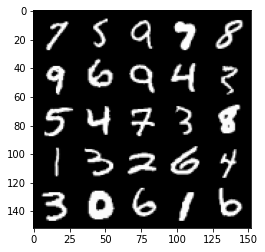

Epoch 34, step 16000: Generator loss: 7.875896050453178, discriminator loss: 0.016842864768113915


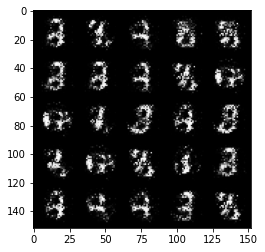

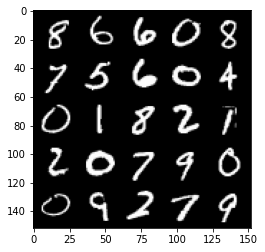

Epoch 36, step 17000: Generator loss: 7.832620496273049, discriminator loss: 0.021053335104370473


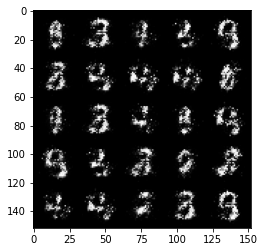

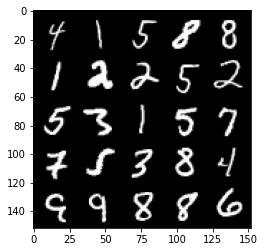

Epoch 38, step 18000: Generator loss: 7.295476915359492, discriminator loss: 0.024429525637067847


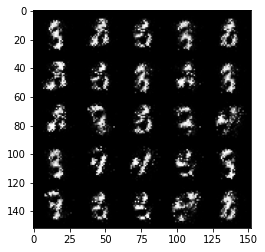

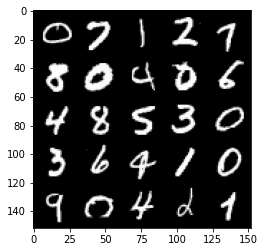

Epoch 40, step 19000: Generator loss: 6.956303855419169, discriminator loss: 0.02616828086087479


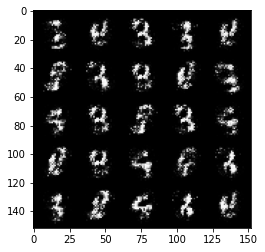

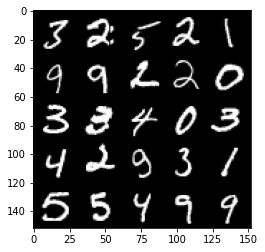

Epoch 42, step 20000: Generator loss: 6.558974746704098, discriminator loss: 0.02834219857840801


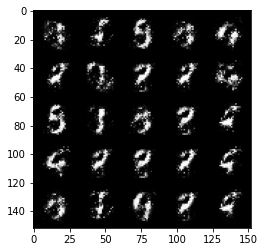

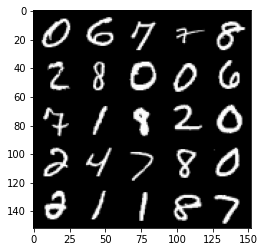

Epoch 44, step 21000: Generator loss: 6.300227045059204, discriminator loss: 0.030201169401174417


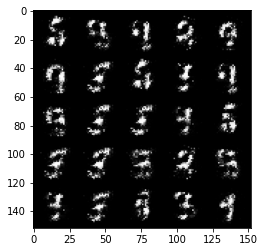

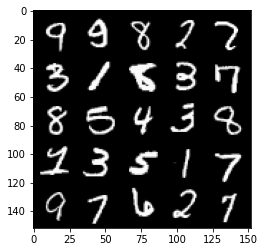

Epoch 46, step 22000: Generator loss: 6.27282718038559, discriminator loss: 0.03392688256665132


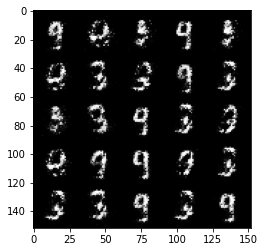

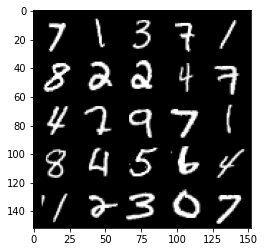

Epoch 49, step 23000: Generator loss: 5.796836450099951, discriminator loss: 0.03770386528549716


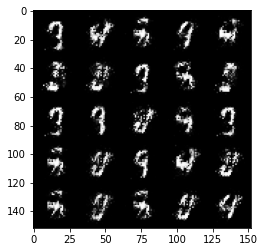

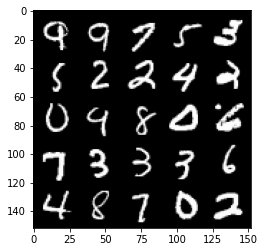

Epoch 51, step 24000: Generator loss: 6.003544407367705, discriminator loss: 0.03666857178136706


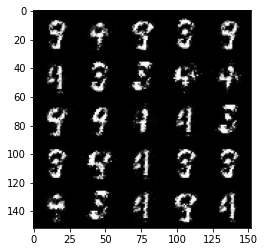

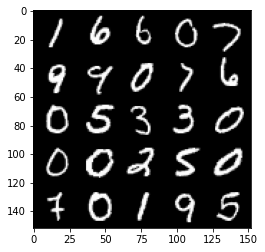

Epoch 53, step 25000: Generator loss: 5.366922636508949, discriminator loss: 0.037650034135207566


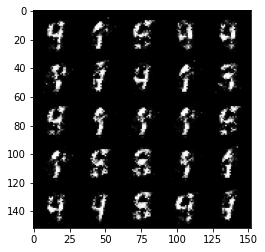

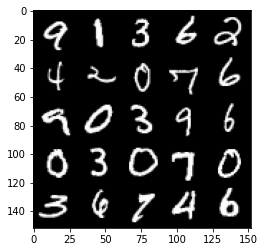

Epoch 55, step 26000: Generator loss: 5.4279079399108845, discriminator loss: 0.043146753266919406


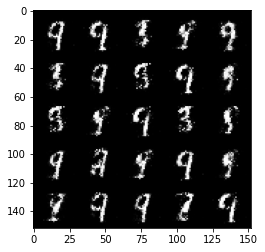

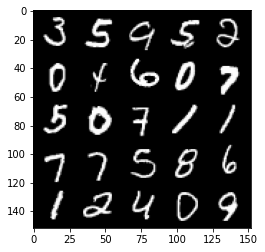

Epoch 57, step 27000: Generator loss: 4.997005412578583, discriminator loss: 0.05354123099008578


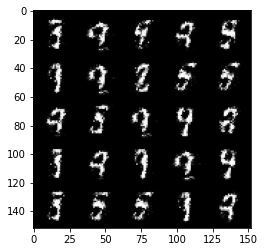

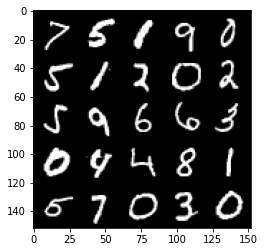

Epoch 59, step 28000: Generator loss: 4.719478159189222, discriminator loss: 0.0636068768231199


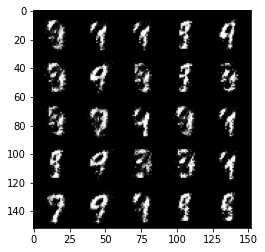

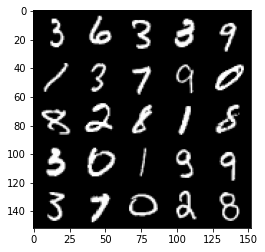

Epoch 61, step 29000: Generator loss: 4.8486110858917275, discriminator loss: 0.05828840676043184


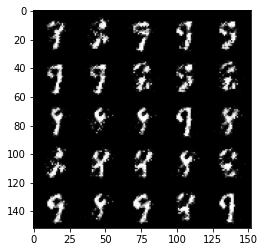

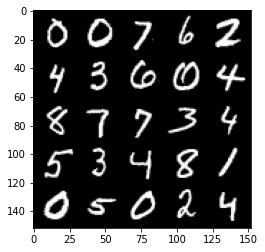

Epoch 63, step 30000: Generator loss: 4.731248842000964, discriminator loss: 0.06729938819818196


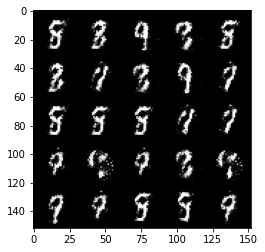

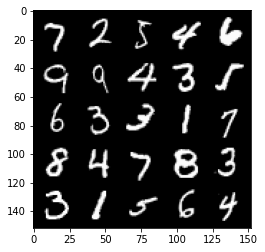

Epoch 66, step 31000: Generator loss: 4.545072777509692, discriminator loss: 0.0687683100495487


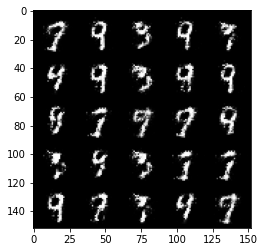

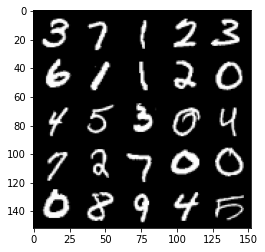

Epoch 68, step 32000: Generator loss: 4.196008589267728, discriminator loss: 0.08169656230602404


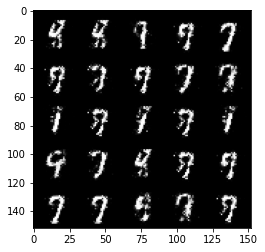

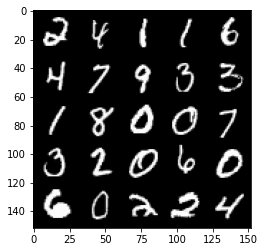

Epoch 70, step 33000: Generator loss: 4.364512321233747, discriminator loss: 0.07570731099694973


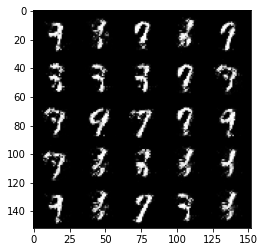

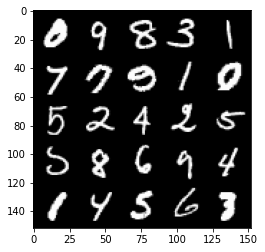

Epoch 72, step 34000: Generator loss: 4.233834386825564, discriminator loss: 0.07814277563802884


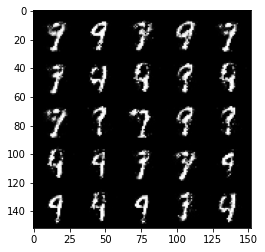

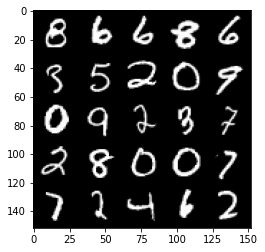

Epoch 74, step 35000: Generator loss: 4.079826662063598, discriminator loss: 0.08079646850749854


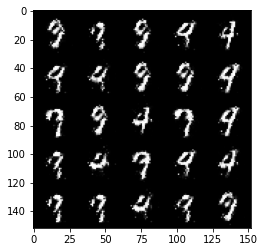

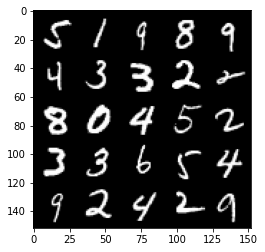

Epoch 76, step 36000: Generator loss: 4.067134781837459, discriminator loss: 0.08584826123528173


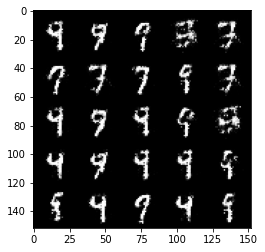

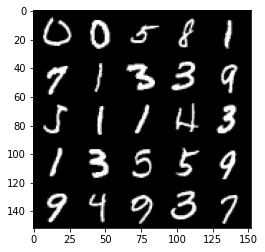

Epoch 78, step 37000: Generator loss: 4.051670366764068, discriminator loss: 0.08664175653457633


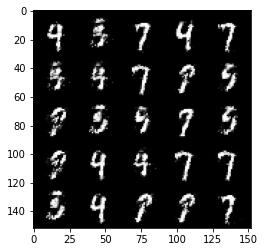

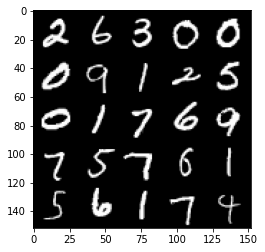

Epoch 81, step 38000: Generator loss: 3.9576622073650425, discriminator loss: 0.0902191254328938


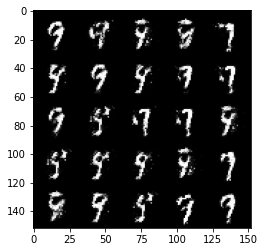

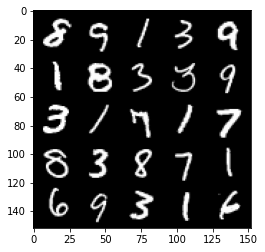

Epoch 83, step 39000: Generator loss: 4.113935270071034, discriminator loss: 0.08525796525180332


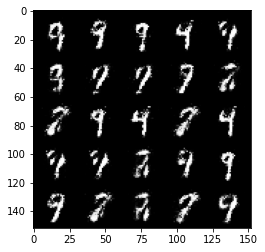

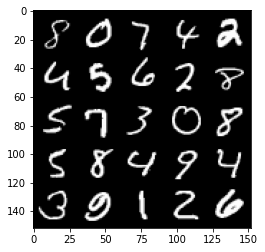

Epoch 85, step 40000: Generator loss: 3.8599380805492403, discriminator loss: 0.09281761942245054


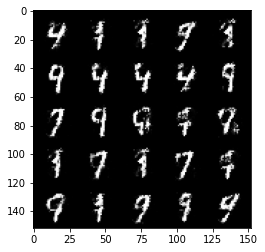

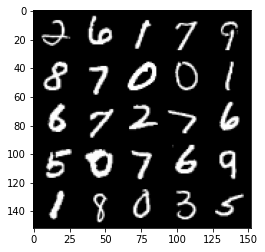

Epoch 87, step 41000: Generator loss: 3.6708099422454907, discriminator loss: 0.10637751934118551


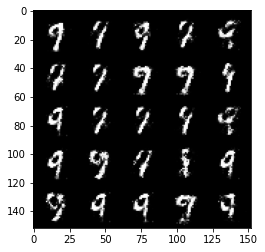

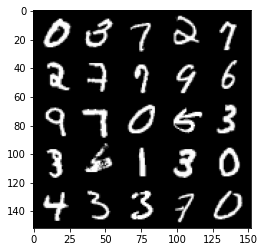

Epoch 89, step 42000: Generator loss: 3.812196465730673, discriminator loss: 0.09476453619264073


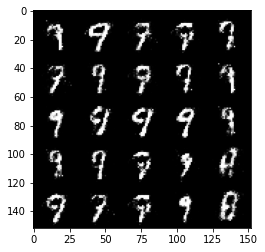

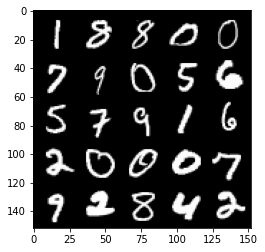

Epoch 91, step 43000: Generator loss: 3.550403500318532, discriminator loss: 0.10895694572851052


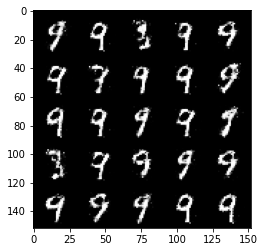

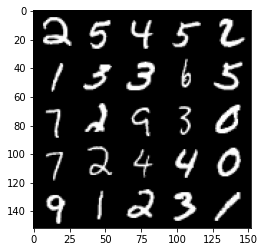

Epoch 93, step 44000: Generator loss: 3.474112934589387, discriminator loss: 0.11598941113054749


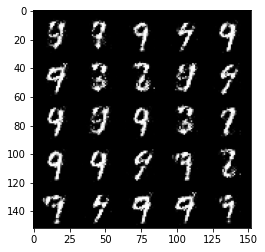

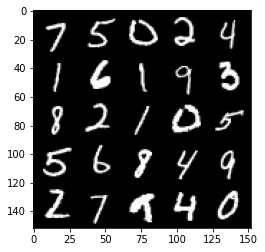

Epoch 95, step 45000: Generator loss: 3.4857434604167894, discriminator loss: 0.11203482985123989


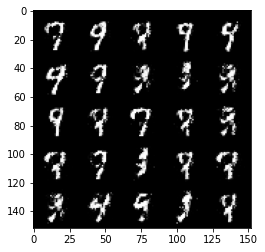

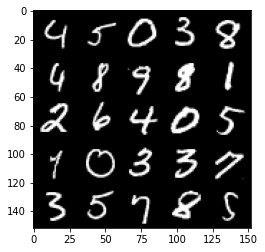

Epoch 98, step 46000: Generator loss: 3.462059584140778, discriminator loss: 0.1223776888549328


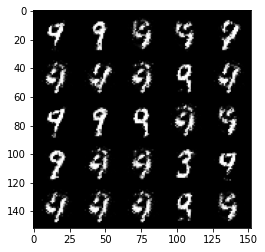

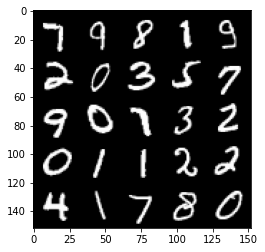

Epoch 100, step 47000: Generator loss: 3.570963957786556, discriminator loss: 0.10566473039239621


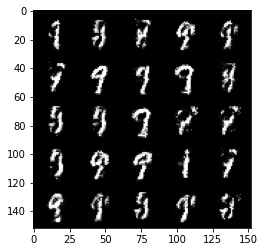

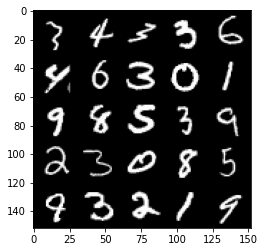

Epoch 102, step 48000: Generator loss: 3.5098559579849233, discriminator loss: 0.11125981667079012


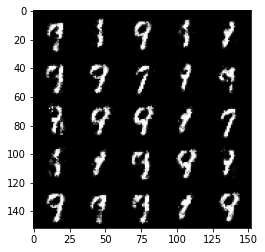

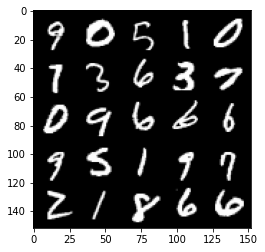

Epoch 104, step 49000: Generator loss: 3.5460826125144953, discriminator loss: 0.10504509989544748


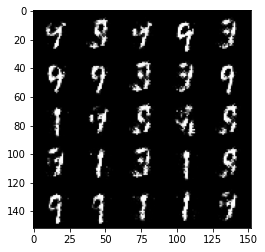

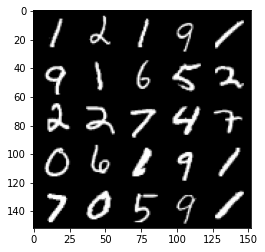

Epoch 106, step 50000: Generator loss: 3.5248334326744124, discriminator loss: 0.11522410601750005


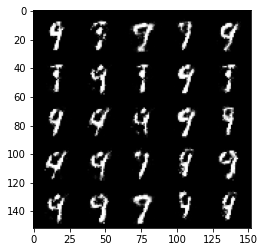

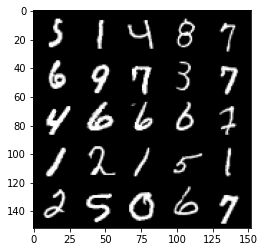

Epoch 108, step 51000: Generator loss: 3.368150714874267, discriminator loss: 0.11639934601448473


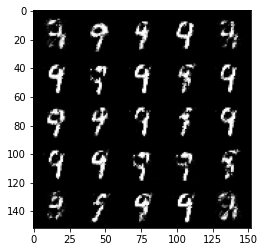

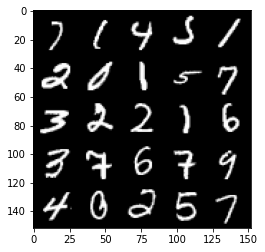

Epoch 110, step 52000: Generator loss: 3.141438460588458, discriminator loss: 0.14346124050021164


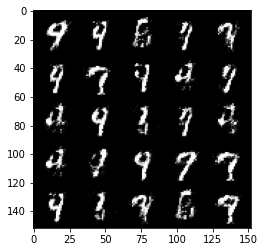

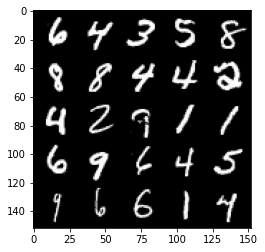

Epoch 113, step 53000: Generator loss: 3.1459845497608168, discriminator loss: 0.14214315137267106


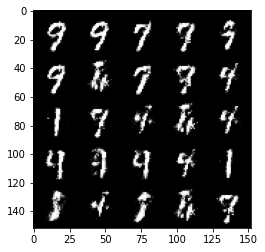

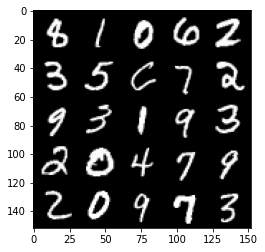

Epoch 115, step 54000: Generator loss: 2.9222044355869268, discriminator loss: 0.16009070692956437


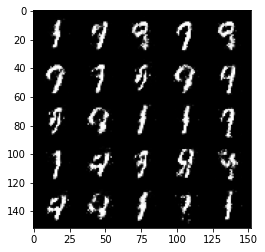

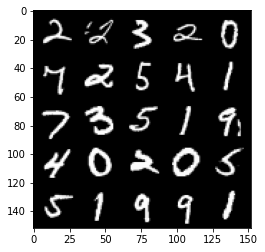

Epoch 117, step 55000: Generator loss: 3.0028619194030837, discriminator loss: 0.15128659664839497


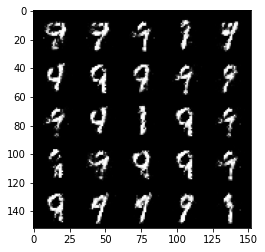

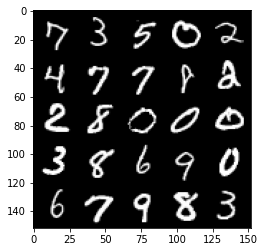

Epoch 119, step 56000: Generator loss: 2.8868559188842777, discriminator loss: 0.1603903758451343


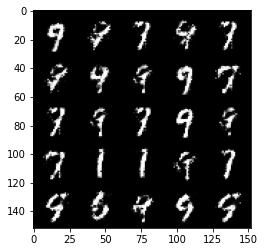

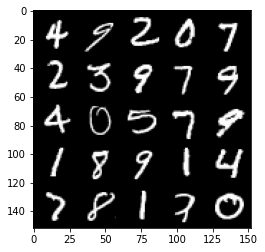

Epoch 121, step 57000: Generator loss: 2.9400645334720616, discriminator loss: 0.15482933651655897


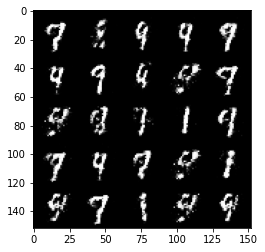

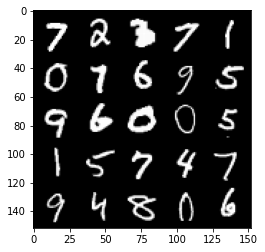

Epoch 123, step 58000: Generator loss: 2.7384699416160623, discriminator loss: 0.1802821419462561


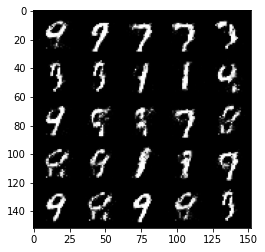

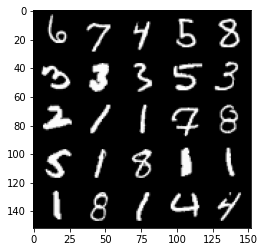

In [ ]:
cur_step = 0
mean_generator_loss = 0
mean_discriminator_loss = 0

for i in range(n_epochs):
  for real,_ in tqdm(dataloader):
    cur_batch_size = len(real)
    real = real.view(cur_batch_size, -1).to(device)
    disc_opt.zero_grad()

    noise = genrate_noise(cur_batch_size, z_dim, device=device)
    fake = gen(noise).detach()
    fake_pred = disc(fake)
    real_pred = disc(real)
    
    fake_loss = criterion(fake_pred,torch.zeros(cur_batch_size, 1).to(device))
    real_loss = criterion(real_pred,torch.ones(cur_batch_size, 1).to(device))  
    disc_loss = (fake_loss + real_loss)/2
    disc_loss.backward(retain_graph=True)
    disc_opt.step()

    gen_opt.zero_grad()
    noise = torch.randn(cur_batch_size, z_dim,device = device)
    gen_vec = gen(noise)
    dis_pred = disc(gen_vec)
    gen_loss = criterion(dis_pred,torch.ones(dis_pred.shape , device=device))
    gen_loss.backward(retain_graph = True)
    gen_opt.step()

    mean_discriminator_loss += disc_loss.item() / display_step
    mean_generator_loss += gen_loss.item() / display_step
    if cur_step % display_step == 0 and cur_step > 0:
            print(f"Epoch {i}, step {cur_step}: Generator loss: {mean_generator_loss}, discriminator loss: {mean_discriminator_loss}")
            fake_noise = genrate_noise(cur_batch_size, z_dim, device=device)
            fake = gen(fake_noise)
            show_image_from_tensor(fake)
            show_image_from_tensor(real)
            mean_generator_loss = 0
            mean_discriminator_loss = 0
    cur_step += 1
print('done')